# Social Network Analysis @ UNIPI
### 29/03/2022

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Second Half

In [2]:
g = nx.Graph()
g.add_edge("a","b")
g.add_edge("a","c")
g.add_edge("b","c")
g.add_edge("b","d")
g.add_edge("b","e")
g.add_edge("c","d")
g.add_edge("d","e")
g.add_edge("d","f")
g.add_edge("e", "a")
g.add_edge("e", "c")
g.add_edge("e","g")
g.add_edge("f","g")
g.add_edge("f", "h")
g.add_edge("g", "d")
g.add_edge("h", "g")
g.add_edge("h", "i")
g.add_edge("i", "g")
g.add_edge("i", "f")

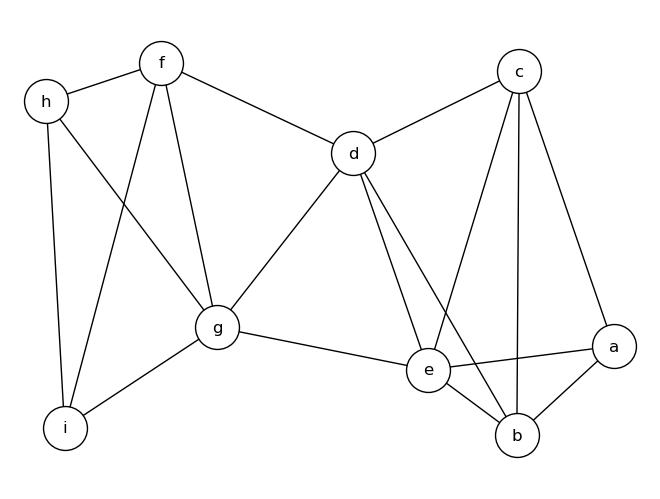

In [3]:
pos = nx.spring_layout(g, seed=0)
options = {"edgecolors": "black", "node_size": 1000, "node_color": "white"}
nx.draw(g, with_labels=True, **options)
plt.show()

## Exercise 1: Community Evaluation [5 points]
Given the Graph G in Figure 1 compare the following partitions:

- P1 = [(a, b, c, d, e), (f, g, h, i)]
- P2 = [(a, b, c), (d, e, f, g, h, i)]

Which partition is the best with respect to Modularity score? and for Conductance?

In [4]:
p1 = [['a','b','c','d','e'], ['f', 'g', 'h', 'i']]
p2 = [['a', 'b', 'c'], ['d', 'e', 'f', 'g', 'h', 'i']]

In [9]:
g.number_of_edges()

18

### Modularity

In [14]:
def modularity(graph, community):
    vc = len(community)
    e = graph.number_of_edges()
    degC = sum([i[1] for i in graph.degree(community)])
    print(graph.degree(community))
    print(vc, e, degC)
    return ((vc/e) - (degC/(2*e)))**2

In [18]:
((3/18) - (11/(2*18)))**2

0.019290123456790133

In [16]:
f"P1 - C1: {modularity(g, p1[0])} C2: {modularity(g, p1[1])}"

[('a', 3), ('b', 4), ('c', 4), ('d', 5), ('e', 5)]
5 18 21
[('f', 4), ('g', 5), ('h', 3), ('i', 3)]
4 18 15


'P1 - C1: 0.09336419753086421 C2: 0.03780864197530866'

In [54]:
m1 = min(modularity(g, p1[0]), modularity(g, p1[1]))
print(m1)

0.03780864197530866


In [51]:
f"P2 - C1: {modularity(g, p2[0])} C2: {modularity(g, p2[1])}"

'P2 - C1: 0.019290123456790133 C2: 0.13040123456790123'

In [19]:
m2 = min(modularity(g, p2[0]), modularity(g, p2[1]))
print(m2)

[('a', 3), ('b', 4), ('c', 4)]
3 18 11
[('d', 5), ('e', 5), ('f', 4), ('g', 5), ('h', 3), ('i', 3)]
6 18 25
0.019290123456790133


#### Best Partition (Modularity): P1

In [56]:
max(m1, m2)

0.03780864197530866

### Conductance

In [58]:
def conductance(graph, community):
    gs = nx.subgraph(graph, community)
    ec = gs.number_of_edges()
    eoc = sum([len(list(graph.neighbors(u)))-len(list(gs.neighbors(u))) for u in community])
    return (2*eoc)/((2*ec)+eoc)

In [59]:
f"P1 - C1: {conductance(g, p1[0])} C2: {conductance(g, p1[1])}"

'P1 - C1: 0.2857142857142857 C2: 0.4'

In [60]:
m1 = max(conductance(g, p1[0]), conductance(g, p1[1]))

In [61]:
f"P2 - C1: {conductance(g, p2[0])} C2: {conductance(g, p2[1])}"

'P2 - C1: 0.9090909090909091 C2: 0.4'

In [62]:
m2 = max(conductance(g, p2[0]), conductance(g, p2[1]))

#### Best partition (conductance): P1

In [63]:
min(m1, m2)

0.4

## Exercise 2: Threshold Model [5 points]

Given the graph G shown in Figure *fig* apply the Threshold model considering
the following two scenarios:

- S1 
    - Set of initial infected nodes: I = {c}
    - Node threshold $\tau$ = 1/5
    - Blocked nodes: B = {b}
    
- S2 
    - Set of initial infected nodes: I = {d}
    - Node theshold $\tau$ = 1/3 if C1 of best partition 1/4 otherwise
    
Consider a node infected at time t iff at least $\tau$\% of its neighbors were already infected at time t - 1

In [20]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", ['c'])

model.set_initial_status(config)

for i in g.nodes():
    config.add_node_configuration("threshold", i, 1/5)
config.add_node_configuration("blocked", 'b', True)

for t in range(10):
    # threshold update
    it = model.iteration()
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: ['c']
Iteration: 1 Infected: ['a', 'd', 'e']
Iteration: 2 Infected: ['f', 'g']
Iteration: 3 Infected: ['h', 'i']
Iteration: 4 Infected: []
Iteration: 5 Infected: []
Iteration: 6 Infected: []
Iteration: 7 Infected: []
Iteration: 8 Infected: []
Iteration: 9 Infected: []


In [21]:
# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", ['d'])

model.set_initial_status(config)

for i in g.nodes():
    if i in p1[0]:
        config.add_node_configuration("threshold", i, 1/3)
    else:
        config.add_node_configuration("threshold", i, 1/4)

for t in range(10):
    # threshold update
    it = model.iteration()
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: ['d']
Iteration: 1 Infected: ['f']
Iteration: 2 Infected: ['g', 'h', 'i']
Iteration: 3 Infected: ['e']
Iteration: 4 Infected: ['a', 'b', 'c']
Iteration: 5 Infected: []
Iteration: 6 Infected: []
Iteration: 7 Infected: []
Iteration: 8 Infected: []
Iteration: 9 Infected: []


## Exercise 3: Community Discovery [4 points]

Given the Graph G shown in Figure 1 compute its communities applying k-
clique for k=3,4,5. Compute AND (average node degree) score for the partition
identified with k=4.

In [25]:
from networkx.algorithms.community import k_clique_communities

k3 = list(k_clique_communities(g, 3))
k3 # complete coverage

[frozenset({'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'})]

In [26]:
k4 = list(k_clique_communities(g, 4))
k4

[frozenset({'f', 'g', 'h', 'i'}), frozenset({'a', 'b', 'c', 'd', 'e'})]

In [27]:
k5 = list(k_clique_communities(g, 5))
k5 # empty coverage

[]

In [28]:
def AND(graph, community):
    sg = nx.subgraph(graph, community)
    degs = [i[1] for i in nx.degree(sg)]    
    vc = sg.number_of_nodes()
    print(sg, degs, vc)
    try:
        return sum(degs)/vc
    except:
        return 0

In [29]:
f"P1 - C1: {AND(g, k4[0])} C2: {AND(g, k4[1])}"

 [3, 3, 3, 3] 4
 [3, 4, 4, 3, 4] 5


'P1 - C1: 3.0 C2: 3.6'

In [93]:
AND3 = min(3.0, 3.6)
AND3

3.0

## Exercise 4: Open Question [2 points]

Discuss at a high level the differences between SI, SIS and SIR epidemic models. 
